# Building your first model: naive Bayes

## Challenge: Feedback analysis 
by: Melissa N 

Data: [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#)

Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## AMAZON CLASSIFIER

In [2]:
# Grab and process the raw data for amazon.
data_1 = open("amazon_cells_labelled.txt")

df_a = pd.read_csv(data_1, delimiter= '\t', header=None)
df_a.columns = ['review', 'sentiment']



In [3]:
display(df_a.head())

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Let's Find the Good review meaning the ones with sentiment = 0

In [4]:
keywords_a = ['great', 'good', 'excellent', 'awesome', 'recommend', 'fast', 'love', 'nice' ]

for key in keywords_a:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_a[str(key)] = df_a.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
keywords_a

['great', 'good', 'excellent', 'awesome', 'recommend', 'fast', 'love', 'nice']

In [6]:
df_a['allcaps'] = df_a.review.str.isupper()

In [7]:
display(df_a.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,True,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False


In [8]:
df_a['sentiment'] = (df_a['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [9]:
display(df_a.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,allcaps
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,True,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False


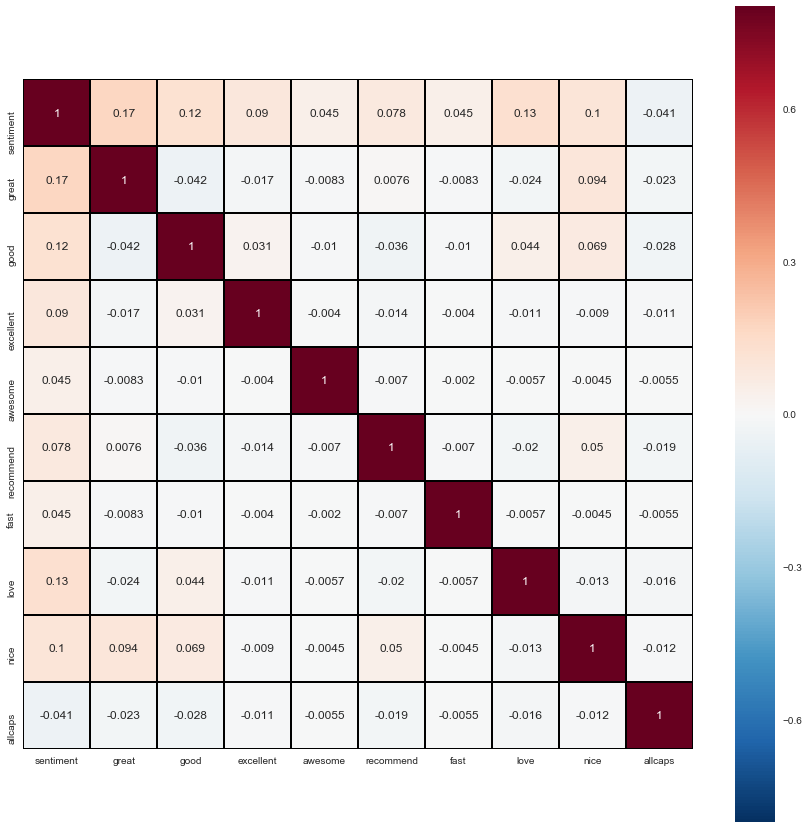

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_a.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

In [11]:
data = df_a[keywords_a + ['allcaps']]
target = df_a['sentiment']

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 402


In [13]:

# Calculating accuracy
(target == y_pred).sum() / data.shape[0] * 100

59.799999999999997

In [14]:

# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[481,  19],
       [383, 117]])

the count of    

true negatives is C_{0,0} = 481    

false negatives is C_{1,0} = 383  

true positives is C_{1,1} = 117  

false positives is C_{0,1} = 19    

In [15]:
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.56      0.96      0.71       500
       True       0.86      0.23      0.37       500

avg / total       0.71      0.60      0.54      1000



Build a text report showing the main classification metrics

## YELP CLASSIFIER

In [16]:
# Grab and process the raw data for Yelp.
data_2 = open("yelp_labelled.txt")

df_y = pd.read_csv(data_2, delimiter= '\t', header=None)
df_y.columns = ['review', 'sentiment']



In [17]:
display(df_y.head())

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Let's Find the Bad reviews meaning the ones with sentiment = 1

In [18]:
keywords_y = ['worst', 'bad', 'horrible', 'disgusted', 'awful', 'bland','slow', 'hated', 'did not like','never' ]

for key in keywords_y:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_y[str(key)] = df_y.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [19]:
keywords_y

['worst',
 'bad',
 'horrible',
 'disgusted',
 'awful',
 'bland',
 'slow',
 'hated',
 'did not like',
 'never']

In [20]:
df_y['allcaps'] = df_y.review.str.isupper()

In [21]:
df_y['sentiment'] = (df_y['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [22]:
display(df_y.head())

,review,sentiment,worst,bad,horrible,disgusted,awful,bland,slow,hated,did not like,never,allcaps
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,False,False,False


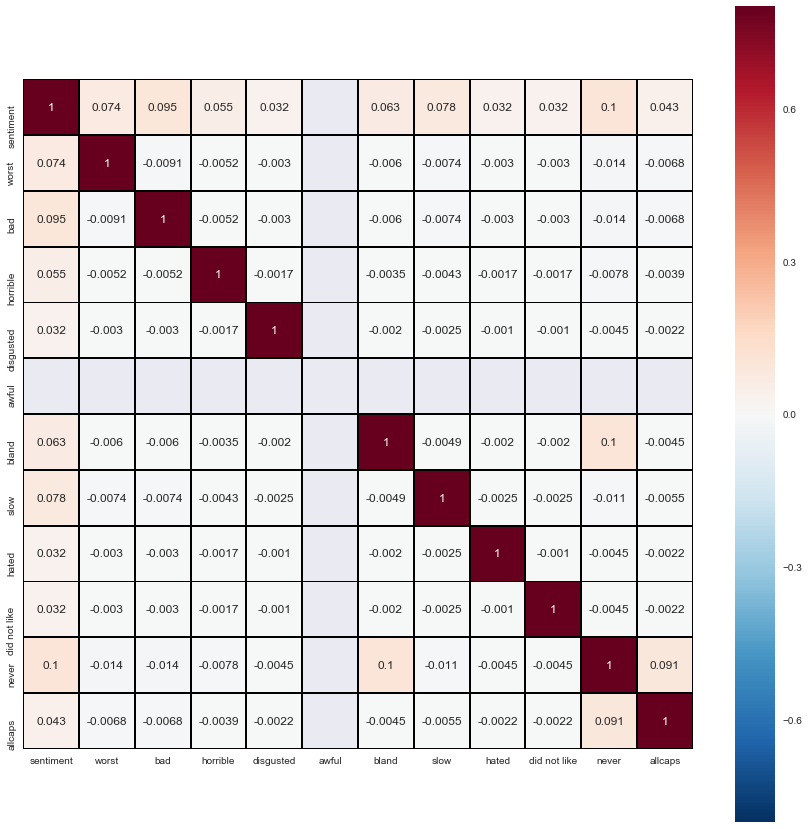

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_y.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

In [24]:
data = df_y[keywords_y + ['allcaps']]
target = df_y['sentiment']

In [25]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 453


In [26]:
# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[495,   5],
       [448,  52]])

the count of    

true negatives is C_{0,0} = 495    

false negatives is C_{1,0} = 448  

true positives is C_{1,1} = 52  

false positives is C_{0,1} = 5    

In [27]:
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.52      0.99      0.69       500
       True       0.91      0.10      0.19       500

avg / total       0.72      0.55      0.44      1000

